# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## **1.讀取數據**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_penguins_data = pd.read_csv(r"C:\Users\User\Desktop\python\penguins.csv")
original_penguins_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# 

## **2.評估數據**

### 2.1評估數據整齊度

#### 為了區分開原紿資料與經過清理的資料，我們創建新的變數`cleaned_penguins_data`。

In [6]:
cleaned_penguins_data = original_penguins_data.copy()
cleaned_penguins_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


#### `cleaned_penguins_data`符合數據整齊度的基本要件。

# 


## **3.數據乾淨度**

### 3.1數據變量的觀察

In [7]:
cleaned_penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### 輸出結果發現，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、 `body_mass_g`和`sex`的變量都存在缺失值；
#### 此外，我們可以把`species`、`island`和`sex`的數據類型變為`category`。

### 3.1.1調整數據類型

In [14]:
cleaned_penguins_data["species"] = cleaned_penguins_data["species"].astype("category")
cleaned_penguins_data["island"] = cleaned_penguins_data["island"].astype("category")
cleaned_penguins_data["sex"] = cleaned_penguins_data["sex"].astype("category")

In [15]:
cleaned_penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


#


### 3.1.2處理缺失數據

#### 首先我們觀察這幾個缺失的變量

In [9]:
cleaned_penguins_data[cleaned_penguins_data["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


#### 可以看到索引為3和339的觀察值，除了種類和所屬島嶼外所有變數都為空，無法為探索企鵝身體屬性相關因素提供價值，因此可以把這兩行直接刪除。

In [12]:
cleaned_penguins_data.drop(3, inplace=True)
cleaned_penguins_data.drop(339, inplace=True)

In [ ]:
### data.dropna(subset=[""])>>> dropna()是「刪除 NaN」的函數。subset參數限定只檢查特定欄位是否有NaN。
###只要「""」欄位中有NaN的列，就會被刪掉。其他欄位有 NaN 不會受影響。刪除列（row），不是刪除欄。

### data.drop(index=3, inplace=True)>>> 這裡的3是依index標籤（label）來刪除的。也就是說它會刪掉 index 名稱為 3 的那一列。

In [16]:
cleaned_penguins_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [ ]:
### data.query("列名.isna()")>>> 意思是「篩出某一欄為 NaN 的列」。
### 其實是用 query()語法來篩選出指定欄位為 NaN 的列（rows）。
### isna()是判斷「是否為 NaN（缺失值）」的函式。它會回傳 True / False。

#### 雖然`sex`有缺失值，但其他變量仍然有存在的意義，可保留這些數據。

#


### 3.1.3處理重複數據

#### 根據資料變數的含義以及內容來看，允許變數重複，我們不需要對此資料檢查是否存在重複值。

# 


### 3.1.4處理不一致數據

#### 不一致數據有可能存在於`species`、`island`和`sex`的變數中，我們查看是否存在多個不同值。

In [17]:
cleaned_penguins_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [18]:
cleaned_penguins_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [19]:
cleaned_penguins_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

#### 結果發現`species`和`island`的值並沒有存在不一致的情況，但`sex`列裡存在一個英文句號值，並不代表任何有效性別，我們應當把該值替換為`NaN`空值。

In [21]:
cleaned_penguins_data['sex'] = cleaned_penguins_data['sex'].replace(".", np.nan)

C:\Users\User\AppData\Local\Temp\ipykernel_15288\3206453285.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_penguins_data['sex'] = cleaned_penguins_data['sex'].replace(".", np.nan)


In [22]:
cleaned_penguins_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#


### 3.1.5處理無效或錯誤數據

In [23]:
cleaned_penguins_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### 從以上統計資訊來看，`cleaned_penguins_data`裡不存在脫離現實意義的數值。

#


## **4.探索數據**

#### 我們將通過資料視覺化，進行探索和分析，從圖表中獲得企鵝樣本資料的相關洞察。

In [24]:
# 設置圖表色盤為"pastel"
sns.set_palette("pastel")
#Seaborn 中設定配色主題（color palette）的一種方式，而且除了 "pastel"，Seaborn 其實有很多 內建調色主題與進階自訂方法 。

In [26]:
cleaned_penguins_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 4.1企鵝種類比例

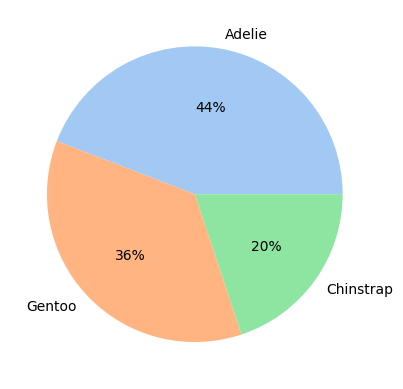

In [29]:
species_count = cleaned_penguins_data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()
#這行程式是用 Matplotlib 的 plt.pie() 來畫「圓餅圖（Pie Chart）」的，而這三個參數 species_count, autopct, labels 分別控制數據、百分比顯示、標籤名稱。

#### 樣本中`Adelie`這個種類的企鵝占比最大，`Gentoo`種類的占比次之，`Chinstrap`的占比最小，為1/5左右。

#


### 4.2企鵝所屬島嶼比例

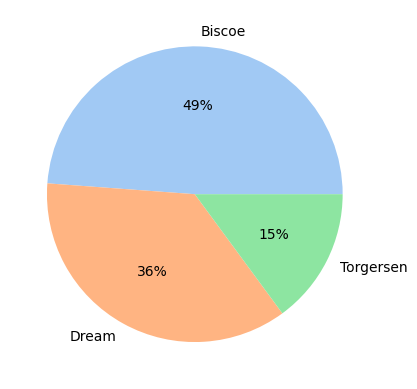

In [30]:
island_count = cleaned_penguins_data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

#### 樣本中一半左右的企鵝樣本都來自`Biscoe`島嶼，占比最大，其次是`Dream`島嶼，來自`Torgersen`島嶼的樣本最少。

#


### 4.3企鵝性別比例

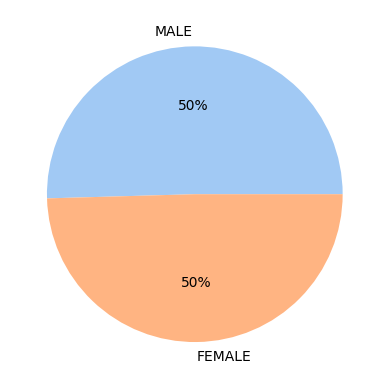

In [31]:
sex_count = cleaned_penguins_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

#### 樣本企鵝的性別占比持平，符合隨機抽樣。

#


### 4.4不同島上的企鵝種類數量

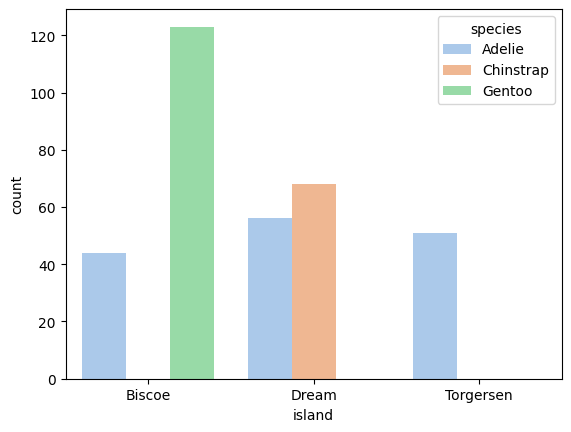

In [32]:
sns.countplot(cleaned_penguins_data, x="island", hue="species")
plt.show()
### 用來畫出「每個分類（island）中，各物種（species）數量分布」的長條圖。

#### 從以上可以看出，`Adelie`種類的企鵝樣本在`Biscoe`、`Dream`、`Torgersen`這三個島上都有，而`Chinstrap`種類只在`Dream`島上才有，`Gentoo`只在`Biscoe`島上才有。

#


### 4.5不同島嶼上的企鵝性別數量

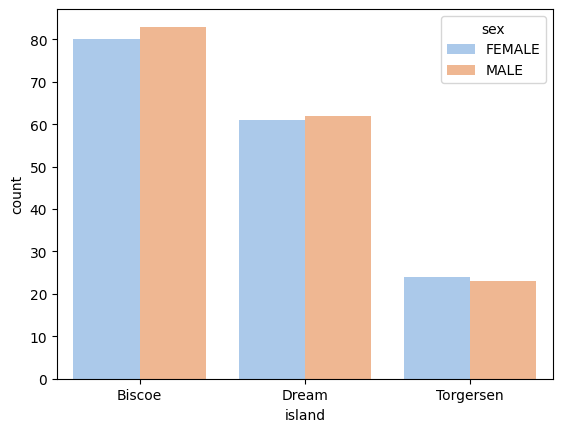

In [34]:
sns.countplot(cleaned_penguins_data, x='island', hue='sex')
plt.show()

#


### 4.6查看數值之間的相關關係

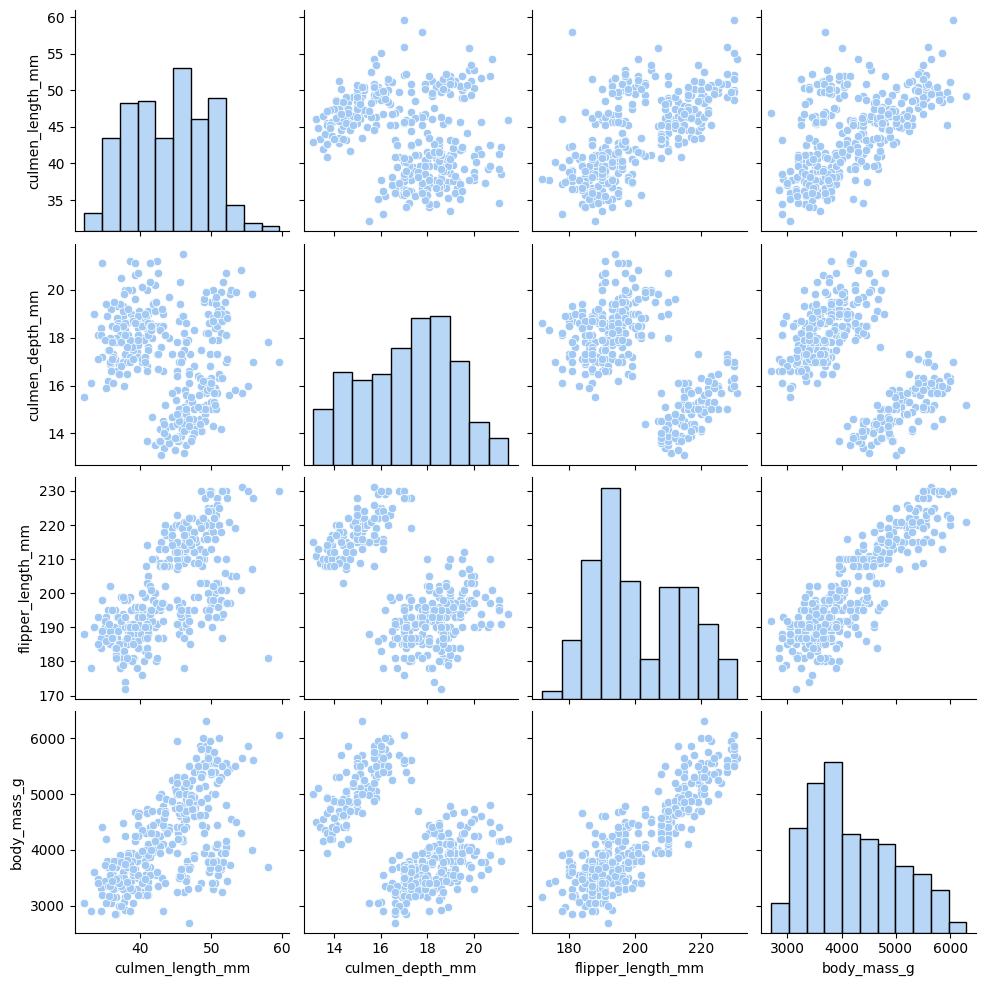

In [36]:
sns.pairplot(cleaned_penguins_data)
plt.show()
### pairplot：會對資料中所有的「數值型欄位」兩兩配對畫散點圖（scatter plot），並在對角線上畫出每個變數的分布圖（直方圖或 KDE 曲線）。
### 它的全名是 pairwise plot（兩兩關係圖）。

#### 從長條圖來看，企鵝樣本的嘴峰長度、嘴峰深度、鰭長度、體重的分佈不是正態分佈。一方面說明，這裡面可能包含了多組存在差異的樣本資料，另一方面也說明樣本數不夠大。

#### 另外可以在散點圖中看出明顯的多個集群，可能與某些因素有關，比如企鵝種類、性別，因此可以對對比進行進一步的分類。


#


### 4.7根據種類查看數值之間的相關關係

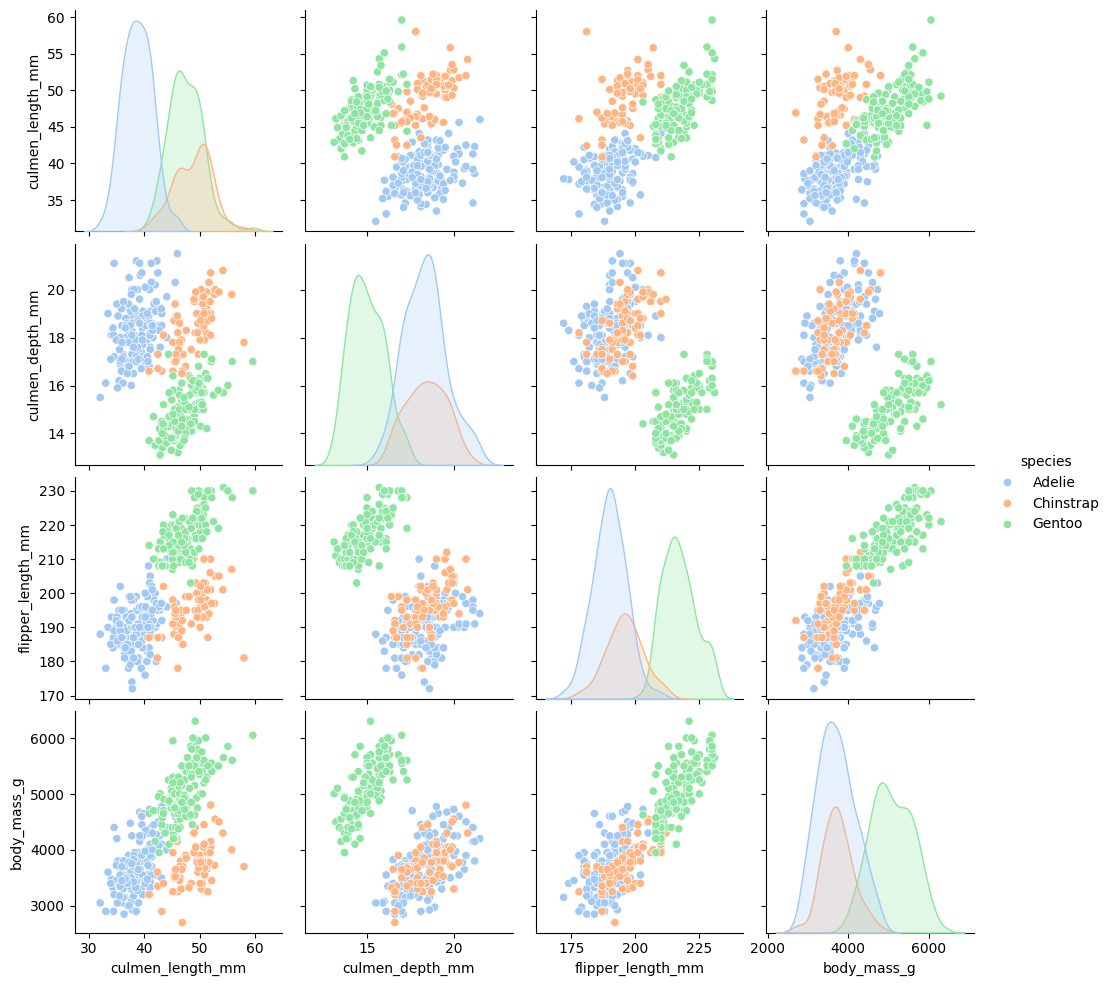

In [37]:
sns.pairplot(cleaned_penguins_data, hue='species')
plt.show()

#### 同一種類的企鵝樣本資料，在散點圖上基本都聚在一起，說明同一種類的企鵝在嘴峰長度、嘴峰深度、鰭長度、體重之間關係上，存在相似性。這些發現有利於我們根據體重、鰭長等數值推測企鵝種類，也可以根據企鵝種類推測體重、鰭長等數值。

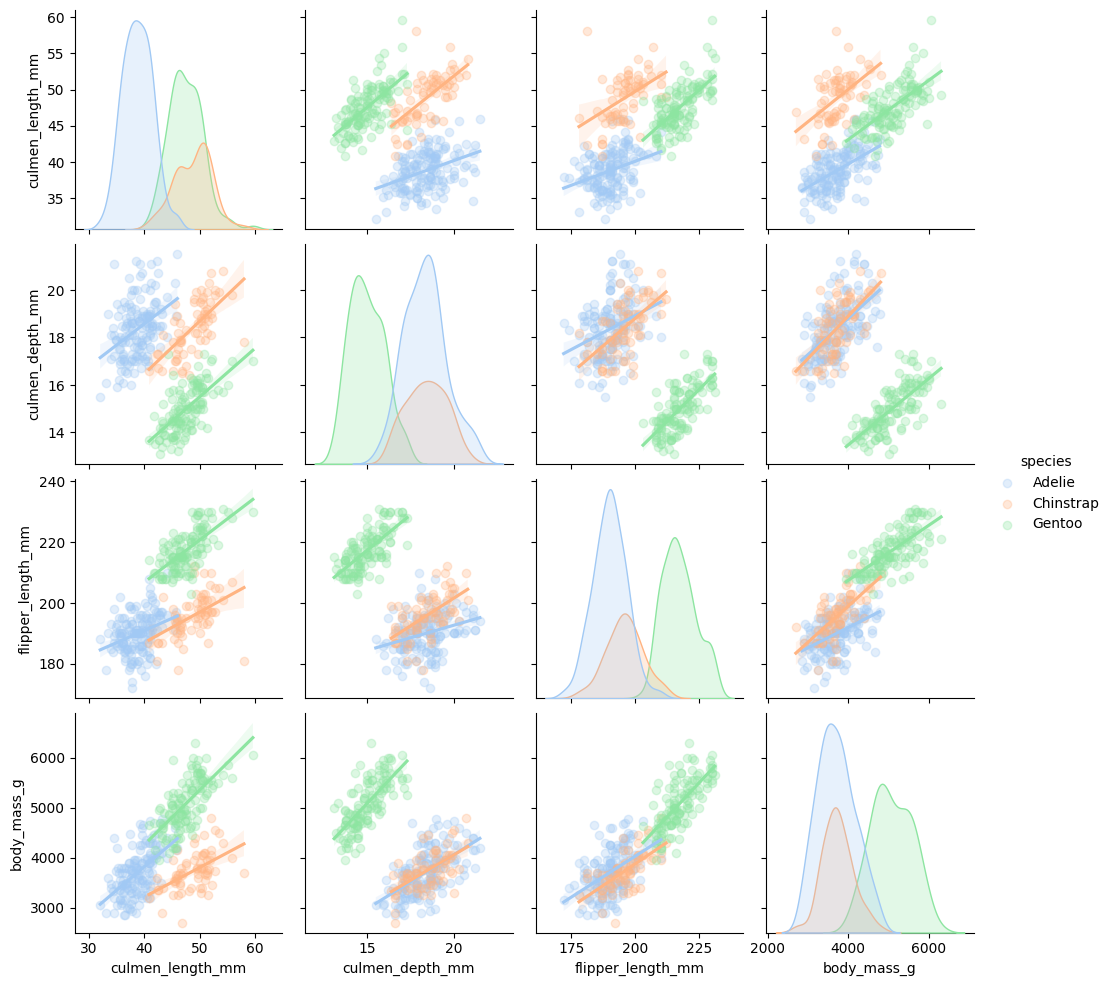

In [38]:
sns.pairplot(cleaned_penguins_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

#### 散點圖結合線性回歸線來看，同類企鵝的屬性資料之間均呈線性正比，即嘴峰越長，嘴峰越深，鰭越長，體重越重，嘴峰越短，嘴峰越淺，鰭越短，體重越輕。

#### 從密度圖的分佈來看，可以得到以下關於樣本的發現：
- Chinstrap和Gentoo的嘴峰長度範圍較為接近，而Adelie的嘴峰長度更短。
- Adelie和Chinstrap的嘴峰深度範圍較為接近，而Gentoo的嘴峰深度更短。
- Adelie的鰭長度最短，Chinstrap中等，而Gentoo的鰭長度嘴長。
- Adelie和Chinstrap的體重範圍較為接近，而Gentoo的體重更大。

#### 但不同種類的屬性數值否存在統計顯著性差異，仍然需要進行假設檢驗後才能得到結論。


#


### 4.8根據性別查看數值之間的相關關係

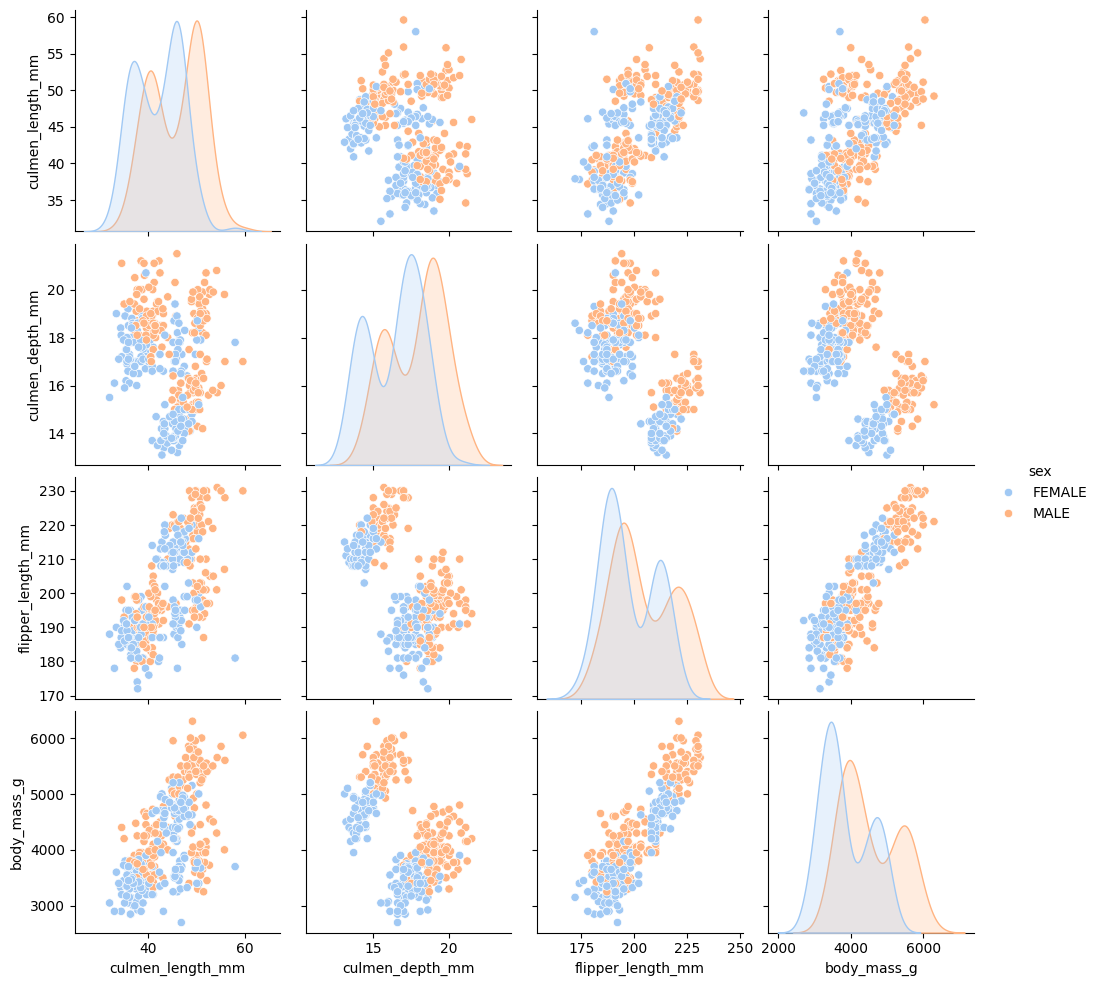

In [39]:
sns.pairplot(cleaned_penguins_data, hue='sex')
plt.show()

#### 根據性別劃分後可以看出，樣本中雄性企鵝在各項屬性數值方面大於雌性企鵝。